In [454]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotnine as gg
from plotnine import *
from sklearn import preprocessing
%matplotlib inline

In [481]:
data = pd.read_csv("/Users/habbasi/Desktop/2016_03_14_TargetID_Wagner_Schenone_BWH/similarity_matrix/combined_median_target_Drug_CSV/combined_normalized_variable_selected/drug_target_combined_normalized_var_selected_UMAP.csv", encoding= "Latin-1")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning:

Columns (1082) have mixed types. Specify dtype option on import or set low_memory=False.



In [482]:
data.shape

(54143, 1083)

# Selecting Target dataset

In [448]:
target = data.loc[data.Metadata_Plate_Map_Name == "C-7217-01-B80-003-A549"]
target = target.reset_index(drop=True)

In [449]:
Metadata = [col for col in target.columns if 'Meta' in col]
Variables = [col for col in target.columns if not 'Meta' in col]


In [445]:

x = target.loc[:, Variables].values
y = target.loc[:, Metadata].values

In [350]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [351]:
pc = pca.fit_transform(x)
df= pd.DataFrame(pc, columns= ['PC-1', 'PC-2', 'PC-3', 'PC-4','PC-5', 'PC-6', 'PC-7', 'PC-8', 'PC-9', 'PC-10'])
#df= pd.DataFrame(pc, columns= ['PC-1', 'PC-2', 'PC-3'])

In [437]:

target_combined = df.merge(target[Metadata], left_index=True, right_index=True)


In [430]:
target_combined['Metadata_platemap'] = None 

combined.loc[combined.Metadata_broad_sample == "DMSO", 'Metadata_platemap'] = 'DMSO'
combined.loc[combined.Metadata_broad_sample != "DMSO", 'Metadata_platemap'] = 'Treatments'

#combined.to_csv('/Users/habbasi/Desktop/target_umap.csv')

In [431]:
#target_combined['Metadata_control_treatments'] = None 

target_combined.loc[target_combined.Metadata_broad_sample == "BRD-K02407574-001-04-8", 'Metadata_control_treatments'] = 'K02407574'
target_combined.loc[target_combined.Metadata_broad_sample == "BRD-K60907894-003-14-4", 'Metadata_control_treatments'] = 'K60907894'
target_combined.loc[target_combined.Metadata_broad_sample == "BRD-K82846253-001-13-9", 'Metadata_control_treatments'] = 'K82846253'
target_combined.loc[target_combined.Metadata_broad_sample == "BRD-K51318897-001-13-8", 'Metadata_control_treatments'] = 'K51318897'
target_combined.loc[target_combined.Metadata_broad_sample == "BRD-K36055864-001-07-7", 'Metadata_control_treatments'] = 'K36055864'
target_combined.loc[target_combined.Metadata_broad_sample == "DMSO", 'Metadata_control_treatments'] = 'DMSO'


# target.loc[(target.Metadata_broad_sample != "DMSO") & (target.Metadata_moa != "Cell Painting control"), 'Metadata_control_treatments'] = 'Treatments'

target_combined = target_combined[(target_combined.Metadata_control_treatments.notnull()) & (target_combined.Metadata_control_treatments != "DMSO")]
target_combined


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,Metadata_pert_id_vendor,Metadata_cell_id,Metadata_broad_sample_type,Metadata_pert_vehicle,Metadata_pert_type,Metadata_moa,Metadata_pert_name,Metadata_platemap,Metadata_submitter,Metadata_control_treatments
348,45.414761,120.017056,-72.427981,1.646675,19.192936,12.564485,20.781379,7.934373,9.896933,-13.843697,...,NaN,A549,trt,DMSO,trt,Cell Painting control,parbendazole,None,NaN,K02407574
349,26.167147,100.123893,-73.245182,12.641314,2.019189,14.004573,24.103983,0.121652,-6.504626,-11.291492,...,NaN,A549,trt,DMSO,trt,Cell Painting control,parbendazole,None,NaN,K02407574
354,-3.452093,-2.522238,5.233793,0.485134,11.684136,0.418682,5.022332,-6.491024,-5.750613,-0.536659,...,NaN,A549,trt,DMSO,trt,Cell Painting control,Adiphenine,None,NaN,K60907894
355,-12.375612,2.058097,10.682360,-9.301384,11.339544,9.563656,8.239463,-1.025961,-11.376190,-2.022050,...,NaN,A549,trt,DMSO,trt,Cell Painting control,Adiphenine,None,NaN,K60907894
356,-5.498644,-3.184823,-0.403597,8.446289,17.766415,-5.435821,1.856940,-7.627266,-9.540161,1.978313,...,NaN,A549,trt,DMSO,trt,Cell Painting control,Repaglinide,None,NaN,K82846253
357,-3.742166,2.838444,0.700964,-1.890749,24.011795,-1.175136,1.213562,-5.568858,-4.185416,-3.239999,...,NaN,A549,trt,DMSO,trt,Cell Painting control,Repaglinide,None,NaN,K82846253
372,19.043970,141.014387,-52.680942,16.812817,5.960442,14.327253,9.501725,2.648996,39.926367,-0.322373,...,NaN,A549,trt,DMSO,trt,Cell Painting control,Fenbendazole,None,NaN,K51318897
373,23.762550,137.280704,-57.227061,16.881111,1.658578,16.521220,6.180728,6.180779,37.232877,-11.945550,...,NaN,A549,trt,DMSO,trt,Cell Painting control,Fenbendazole,None,NaN,K51318897
374,6.624629,67.444933,-2.608018,-8.350958,-33.677030,-25.411970,-4.241895,1.442716,-6.917191,-11.424038,...,NaN,A549,trt,DMSO,trt,Cell Painting control,Cycloheximide,None,NaN,K36055864
375,22.760326,48.767593,-13.625517,-4.424185,-37.424329,-26.968183,-9.318899,6.143921,0.071380,-15.939535,...,NaN,A549,trt,DMSO,trt,Cell Painting control,Cycloheximide,None,NaN,K36055864


/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: /Users/habbasi/Desktop/target_cellpaintingcontrols_PCA.png

/usr/local/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning:

geom_point : Removed 2 rows containing missing values.

/usr/local/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning:

geom_point : Removed 2 rows containing missing values.



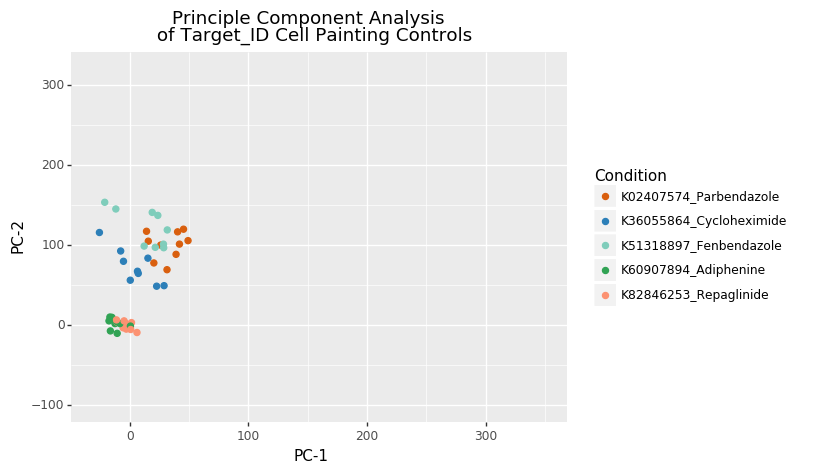

<ggplot: (385772047)>

In [433]:
p = gg.ggplot(target_combined, gg.aes(x='PC-1', y='PC-2', color= 'Metadata_control_treatments')) + \
    gg.geom_point(size = 2) + \
    gg.xlab("PC-1") + \
    gg.ylab("PC-2") + \
    gg.ggtitle("Principle Component Analysis \n of Target_ID Cell Painting Controls") + \
    gg.xlim(-30,350) + \
    gg.ylim(-100,320) + \
    gg.scale_colour_manual(name= "Condition", labels=['K02407574_Parbendazole', 
                                                       'K36055864_Cycloheximide', 
                                                       'K51318897_Fenbendazole',
                                                         'K60907894_Adiphenine',
                                                          'K82846253_Repaglinide'], 
                           values = ["#d95f0e", "#2c7fb8", "#7fcdbb", "#31a354", "#fc9272"])
   


    

ggsave(filename='target_cellpaintingcontrols_PCA.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

In [438]:

target_combined.loc[target_combined.Metadata_broad_sample == "BRD-K02407574-001-04-8", 'Metadata_control_treatments'] = 'K02407574'
target_combined.loc[target_combined.Metadata_broad_sample == "BRD-K60907894-003-14-4", 'Metadata_control_treatments'] = 'K60907894'
target_combined.loc[target_combined.Metadata_broad_sample == "BRD-K82846253-001-13-9", 'Metadata_control_treatments'] = 'K82846253'
target_combined.loc[target_combined.Metadata_broad_sample == "BRD-K51318897-001-13-8", 'Metadata_control_treatments'] = 'K51318897'
target_combined.loc[target_combined.Metadata_broad_sample == "BRD-K36055864-001-07-7", 'Metadata_control_treatments'] = 'K36055864'
target_combined.loc[target_combined.Metadata_broad_sample == "DMSO", 'Metadata_control_treatments'] = 'DMSO'


# target.loc[(target.Metadata_broad_sample != "DMSO") & (target.Metadata_moa != "Cell Painting control"), 'Metadata_control_treatments'] = 'Treatments'

target_combined = target_combined[target_combined.Metadata_control_treatments.notnull()]
target_combined



,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,Metadata_pert_id_vendor,Metadata_cell_id,Metadata_broad_sample_type,Metadata_pert_vehicle,Metadata_pert_type,Metadata_moa,Metadata_pert_name,Metadata_platemap,Metadata_submitter,Metadata_control_treatments
0,-1.811953,22.401334,1.690720,-21.452421,8.542055,-13.016563,16.291432,10.823572,10.642353,11.197471,...,NaN,NaN,control,NaN,control,NaN,NaN,DMSO,NaN,DMSO
1,-12.947421,2.218148,-3.025503,-1.099626,2.243402,-4.656033,18.770893,2.518912,4.092390,17.809415,...,NaN,A549,control,DMSO,control,NaN,NaN,DMSO,NaN,DMSO
22,-17.503793,-6.828892,3.636579,1.428310,-7.052338,4.122890,18.361665,5.508894,5.380173,8.722337,...,NaN,A549,control,NaN,control,NaN,NaN,DMSO,NaN,DMSO
23,-17.117130,9.588997,4.545845,-7.438921,4.117543,2.797419,24.129010,11.618321,3.516729,4.062250,...,NaN,A549,control,DMSO,control,NaN,NaN,DMSO,NaN,DMSO
24,-0.178398,-4.438640,-4.147153,-2.857221,-1.396596,-7.935568,12.107566,-1.353262,8.131059,14.850255,...,NaN,A549,control,NaN,control,NaN,NaN,DMSO,NaN,DMSO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,-17.347089,32.096182,16.183673,-10.398005,-21.602173,-15.354852,-4.458372,-2.476370,5.702520,-13.368911,...,NaN,A549,control,DMSO,control,NaN,NaN,DMSO,NaN,DMSO
1916,-28.750873,46.289037,18.975266,-3.311138,-29.631941,-23.580397,-3.196416,1.045952,2.488255,-11.790919,...,NaN,A549,control,DMSO,control,NaN,NaN,DMSO,NaN,DMSO
1917,-23.046522,29.853329,19.301324,-4.312670,-27.171341,-14.901229,11.524766,3.836504,2.818949,-2.940114,...,NaN,A549,control,DMSO,control,NaN,NaN,DMSO,NaN,DMSO
1918,-24.177926,46.478270,19.727441,3.504447,-34.188327,-25.362672,3.663031,-5.833895,8.728847,-14.153218,...,NaN,A549,control,NaN,control,NaN,NaN,DMSO,NaN,DMSO


/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: /Users/habbasi/Desktop/target_cellpaintingcontrols_DMSO_PCA.png

/usr/local/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning:

geom_point : Removed 7 rows containing missing values.

/usr/local/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning:

geom_point : Removed 7 rows containing missing values.



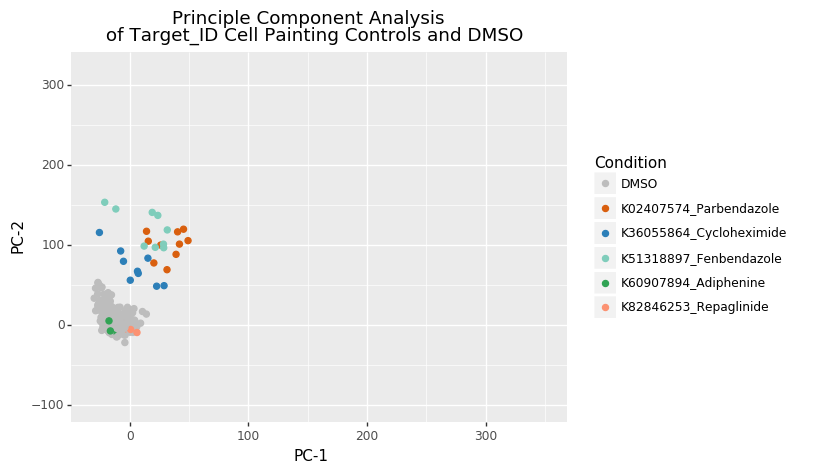

<ggplot: (-9223372036469268220)>

In [439]:
p = gg.ggplot(target_combined, gg.aes(x='PC-1', y='PC-2', color= 'Metadata_control_treatments')) + \
    gg.geom_point(size = 2) + \
    gg.xlab("PC-1") + \
    gg.ylab("PC-2") + \
    gg.ggtitle("Principle Component Analysis \n of Target_ID Cell Painting Controls and DMSO") + \
    gg.xlim(-30,350) + \
    gg.ylim(-100,320) + \
    gg.scale_colour_manual(name= "Condition", labels=['DMSO','K02407574_Parbendazole', 
                                                       'K36055864_Cycloheximide', 
                                                       'K51318897_Fenbendazole',
                                                         'K60907894_Adiphenine',
                                                          'K82846253_Repaglinide'], 
                           values = ["#bdbdbd","#d95f0e", "#2c7fb8", "#7fcdbb", "#31a354", "#fc9272"])
   


    

ggsave(filename='target_cellpaintingcontrols_DMSO_PCA.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

In [330]:
target_DMSO = combined[combined.Metadata_platemap == "DMSO"]
target_treatments = combined[combined.Metadata_platemap == "Treatments"]

In [332]:
pca.explained_variance_ratio_

array([0.39763896, 0.18151831, 0.0804443 , 0.04848244, 0.03970329,
       0.02891014, 0.02284609, 0.01911166, 0.01721521, 0.01367548])

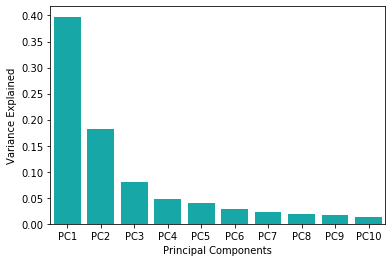

In [331]:
# combined['Metadata_compounds'] = combined['Metadata_broad_sample'] + "_" + combined['Metadata_platemap']
# combined['Metadata_compounds'] = combined['Metadata_compounds'].str.replace('BRD-', '')
# [combined.Metadata_compounds.str.contains('_t') for x in combined.Metadata_compounds]
# combined
import seaborn as sns
d = pd.DataFrame({'var': pca.explained_variance_ratio_,
                 'PC': ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']})
ax = sns.barplot(x='PC',y="var", 
           data=d, color="c");

ax.set(xlabel = "Principal Components", ylabel= "Variance Explained")
plt.savefig("/Users/habbasi/Desktop/Screeplot_target_ID.png")


In [201]:
import plotly.express as px
import plotly.express as go


fig = px.scatter_3d(combined, x='PC-1', y='PC-2', z='PC-3',
               color='Metadata_platemap', opacity=0.5, size_max=0.1)

fig.update_traces(marker=dict(size=2),
                  selector=dict(mode='markers'))

fig.update_layout(
    title="Three dimensional Plot",
    xaxis_title="x Axis Title",
    yaxis_title="y Axis Title",
    font=dict(
        family="Arial",
        size=10
    )
)

fig.show()
#fig.write_image("/Users/habbasi/Desktop/3d_PCA_target_ID.png")

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: /Users/habbasi/Desktop/PCA_clustering_Target_ID.png

/usr/local/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning:

geom_point : Removed 37 rows containing missing values.

/usr/local/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning:

geom_point : Removed 37 rows containing missing values.



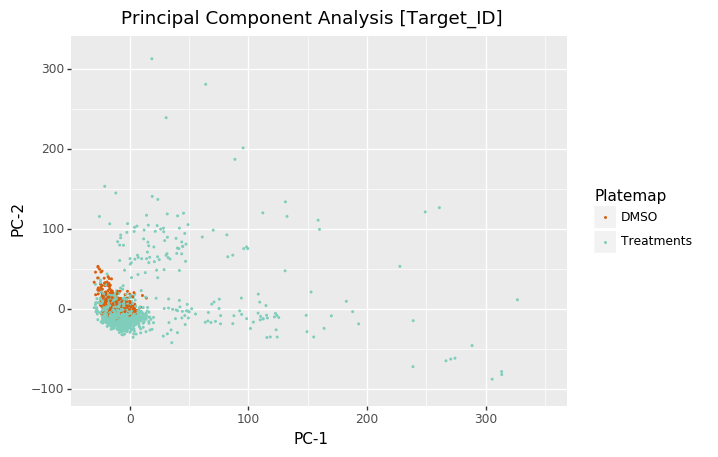

<ggplot: (-9223372036486743036)>

In [313]:
p = gg.ggplot(combined, gg.aes(x='PC-1', y='PC-2', color= 'Metadata_platemap')) + \
    gg.geom_point(size = 0.2) + \
    gg.xlab("PC-1") + \
    gg.ylab("PC-2") + \
    gg.ggtitle("Principal Component Analysis [Target_ID]") + \
    gg.scale_colour_manual(name= "Platemap", labels=['DMSO', 'Treatments'], values = ["#d95f0e", "#7fcdbb"]) + \
    gg.xlim(-30,350) + \
    gg.ylim(-100,320)


    

ggsave(filename='PCA_clustering_Target_ID.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: /Users/habbasi/Desktop/PCA_clustering_Target_ID_DMSO.png

/usr/local/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning:

geom_point : Removed 5 rows containing missing values.

/usr/local/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning:

geom_point : Removed 5 rows containing missing values.



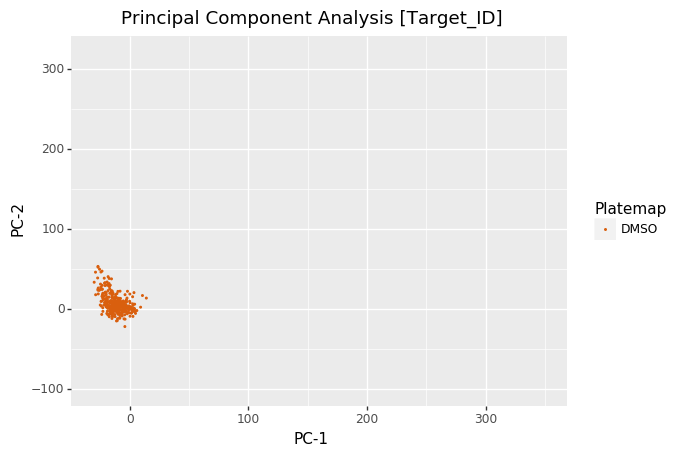

<ggplot: (375493026)>

In [319]:
p = gg.ggplot(target_DMSO, gg.aes(x='PC-1', y='PC-2', color= 'Metadata_platemap')) + \
    gg.geom_point(size = 0.2) + \
    gg.xlab("PC-1") + \
    gg.ylab("PC-2") + \
    gg.ggtitle("Principal Component Analysis [Target_ID]") + \
    gg.scale_colour_manual(name= "Platemap", labels=['DMSO'], values = ["#d95f0e"]) + \
    gg.xlim(-30,350) + \
    gg.ylim(-100,320)


    

ggsave(filename='PCA_clustering_Target_ID_DMSO.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: /Users/habbasi/Desktop/PCA_clustering_Target_ID_DMSO.png

/usr/local/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning:

geom_point : Removed 32 rows containing missing values.

/usr/local/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning:

geom_point : Removed 32 rows containing missing values.



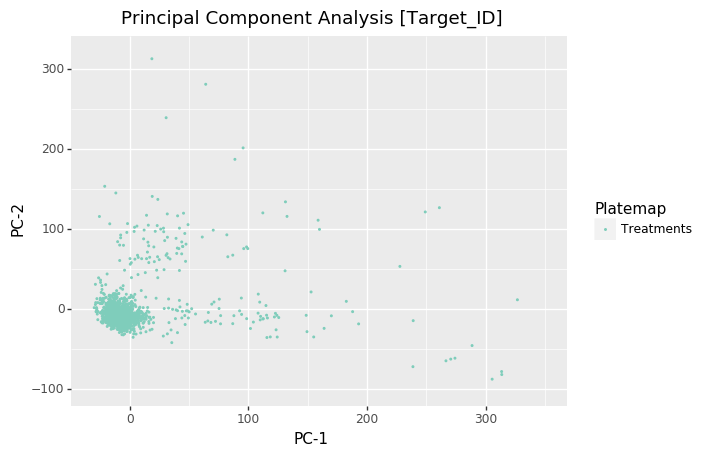

<ggplot: (335085225)>

In [318]:
p = gg.ggplot(target_treatments, gg.aes(x='PC-1', y='PC-2', color= 'Metadata_platemap')) + \
    gg.geom_point(size = 0.2) + \
    gg.xlab("PC-1") + \
    gg.ylab("PC-2") + \
    gg.ggtitle("Principal Component Analysis [Target_ID]") + \
    gg.scale_colour_manual(name= "Platemap", labels=['Treatments'], values = ["#7fcdbb"]) + \
    gg.xlim(-30,350) + \
    gg.ylim(-100,320)


    

ggsave(filename='PCA_clustering_Target_ID_treatments.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

In [333]:
drug = data.loc[data.Metadata_Plate_Map_Name != "C-7217-01-B80-003-A549"]
drug = drug.reset_index(drop=True)
drug.shape

(52223, 1083)

In [334]:
Metadata = [col for col in drug.columns if 'Meta' in col]
Variables = [col for col in drug.columns if not 'Meta' in col]


In [335]:
x = drug.loc[:, Variables].values
y = drug.loc[:, Metadata].values


In [336]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [337]:
pc = pca.fit_transform(x)
df= pd.DataFrame(pc, columns= ['PC-1', 'PC-2', 'PC-3', 'PC-4','PC-5', 'PC-6', 'PC-7', 'PC-8', 'PC-9', 'PC-10'])
#df= pd.DataFrame(pc, columns= ['PC-1', 'PC-2', 'PC-3'])

In [338]:
combined = df.merge(drug[Metadata], left_index=True, right_index=True)
combined.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,Metadata_pert_well,Metadata_pert_id_vendor,Metadata_cell_id,Metadata_broad_sample_type,Metadata_pert_vehicle,Metadata_pert_type,Metadata_moa,Metadata_pert_name,Metadata_platemap,Metadata_submitter
0,-45.792504,1.511997,3.200414,-2.751878,5.949730,-2.562265,-2.640527,-4.126992,4.738079,2.003049,...,A01,NaN,A549,control,DMSO,control,NaN,NaN,DMSO,NaN
1,-36.341872,-6.751038,16.543808,0.841329,0.967620,4.765585,0.268162,0.243957,-0.033766,9.122367,...,A02,NaN,A549,control,DMSO,control,NaN,NaN,DMSO,NaN
2,-46.061721,1.158258,4.449041,-1.786041,9.171571,-2.343610,1.478709,-1.324118,-2.257361,9.187407,...,A03,NaN,A549,control,DMSO,control,NaN,NaN,DMSO,NaN
3,-43.614084,1.344196,-2.857284,-2.048116,8.384205,-12.049199,-0.743003,-1.488633,1.298492,1.680458,...,A04,NaN,A549,control,DMSO,control,NaN,NaN,DMSO,NaN
4,-46.435675,-0.003820,8.544307,2.554310,8.762108,-4.174074,1.025973,-3.127076,6.522554,4.121685,...,A05,NaN,A549,control,DMSO,control,NaN,NaN,DMSO,NaN


In [235]:
pca.explained_variance_ratio_

array([0.56795814, 0.19764479, 0.04463128, 0.03351833, 0.0191737 ,
       0.01481393, 0.01116341, 0.00918717, 0.00829872, 0.00709101])

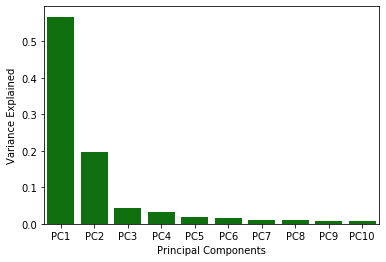

In [249]:
import seaborn as sns
d = pd.DataFrame({'var': pca.explained_variance_ratio_,
                 'PC': ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']})
ax = sns.barplot(x='PC',y="var", 
           data=d, color="g");

ax.set(xlabel = "Principal Components", ylabel= "Variance Explained")
plt.savefig("/Users/habbasi/Desktop/Screeplot_Drug_Repurposing.png")


In [272]:
combined['Metadata_new'] = None 

combined.loc[combined.Metadata_broad_sample == "DMSO", 'Metadata_new'] = 'DMSO'
combined.loc[combined.Metadata_broad_sample != "DMSO", 'Metadata_new'] = 'NaN'
combined_dmso = combined.loc[combined.Metadata_platemap == "DMSO"]
combined_t = combined.loc[combined.Metadata_platemap == "d"]
combined_t

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,Metadata_pert_id_vendor,Metadata_cell_id,Metadata_broad_sample_type,Metadata_pert_vehicle,Metadata_pert_type,Metadata_moa,Metadata_pert_name,Metadata_platemap,Metadata_submitter,Metadata_new
6,-46.721948,1.790827,7.212070,-1.457875,7.448427,0.840524,-3.543940,-2.351538,2.933395,-1.664240,...,NaN,A549,trt,DMSO,trt,enzyme inducer,climbazole,d,NaN,NaN
7,-34.585449,-5.648501,11.903004,-5.321684,13.474534,-4.734426,-3.302874,-1.117666,4.607934,3.654895,...,NaN,A549,trt,DMSO,trt,enzyme inducer,climbazole,d,NaN,NaN
8,-43.017563,-3.388794,18.006611,4.333630,-1.155913,5.264558,-1.519056,2.627498,-0.436467,3.094348,...,NaN,A549,trt,DMSO,trt,enzyme inducer,climbazole,d,NaN,NaN
9,-45.045321,-1.813832,14.867261,4.109887,-1.345781,3.615431,1.564433,3.439389,-2.993259,6.007597,...,NaN,A549,trt,DMSO,trt,enzyme inducer,climbazole,d,NaN,NaN
10,-44.556909,-2.591730,14.825452,7.756151,-7.668693,3.008167,0.806883,7.956261,-3.756756,7.805213,...,NaN,A549,trt,DMSO,trt,enzyme inducer,climbazole,d,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52218,-45.843803,5.306937,-22.574698,4.408621,-13.908112,66.493536,37.407732,-0.813515,-15.867074,28.531531,...,NaN,A549,trt,DMSO,trt,BCL inhibitor,navitoclax,d,NaN,NaN
52219,-48.227024,9.661871,-8.910309,-17.093005,12.086806,27.004841,30.231391,1.630823,-15.247727,35.323932,...,NaN,A549,trt,DMSO,trt,BCL inhibitor,navitoclax,d,NaN,NaN
52220,-50.547193,6.096105,10.881682,3.426792,-5.314276,49.019274,31.945054,5.568997,-11.559320,30.328172,...,NaN,A549,trt,DMSO,trt,BCL inhibitor,navitoclax,d,NaN,NaN
52221,-47.517649,5.350438,-5.595107,1.450955,-10.622644,95.459007,59.106369,12.796557,-39.925569,55.590606,...,NaN,A549,trt,DMSO,trt,BCL inhibitor,navitoclax,d,NaN,NaN


/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: /Users/habbasi/Desktop/PCA_clustering_Drug_Repurposing_DMSO.png



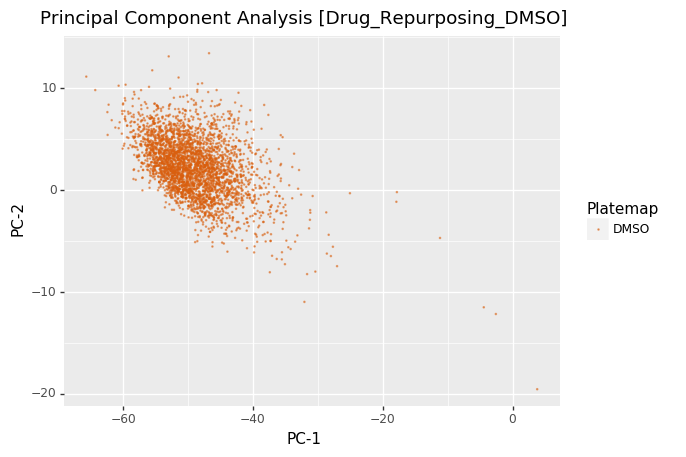

<ggplot: (328141460)>

In [291]:
p = gg.ggplot(combined_dmso, gg.aes(x='PC-1', y='PC-2', color= 'Metadata_platemap')) + \
    gg.geom_point(size = 0.05, alpha=0.5) + \
    gg.xlab("PC-1") + \
    gg.ylab("PC-2") + \
    gg.ggtitle("Principal Component Analysis [Drug_Repurposing_DMSO]") + \
    gg.scale_colour_manual(name= "Platemap", labels=['DMSO'], values = ["#d95f0e"])


#    + \
#     gg.xlim(-60, 3000) + \
#     gg.ylim(-20, 3000) + \ 

ggsave(filename='PCA_clustering_Drug_Repurposing_DMSO.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: /Users/habbasi/Desktop/PCA_clustering_Drug_Repurposing_Treatments.png



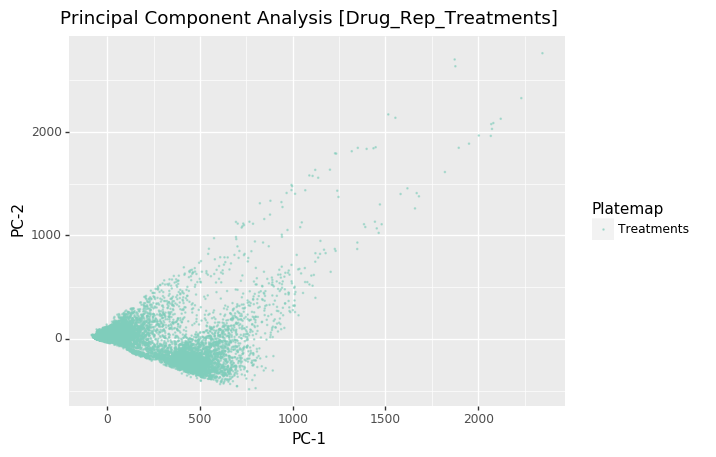

<ggplot: (-9223372036526634208)>

In [292]:
p = gg.ggplot(combined_t, gg.aes(x='PC-1', y='PC-2', color= 'Metadata_platemap')) + \
    gg.geom_point(size = 0.05, alpha=0.5) + \
    gg.xlab("PC-1") + \
    gg.ylab("PC-2") + \
    gg.ggtitle("Principal Component Analysis [Drug_Rep_Treatments]") + \
    gg.scale_colour_manual(name= "Platemap", labels=['Treatments'], values = ["#7fcdbb"])


    

ggsave(filename='PCA_clustering_Drug_Repurposing_Treatments.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

In [ ]:
p = gg.ggplot(combined_dmso, gg.aes(x='PC-1', y='PC-2', color= 'Metadata_new')) + \
    gg.geom_point(size = 0.05, alpha=0.5) + \
    gg.xlab("PC-1") + \
    gg.ylab("PC-2") + \
    gg.ggtitle("Principal Component Analysis [Target_ID]") #+ \
#     gg.scale_colour_manual(name= "Platemap", labels=['DMSO', 'NaN'], values = ["#d95f0e", "#7fcdbb"])


    

ggsave(filename='PCA_clustering_Drug_Repurposing.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

In [13]:
Metadata = [col for col in target.columns if "Meta" in col]
Variables = [col for col in target.columns if not "Meta" in col]

In [14]:
data['Metadata_broad_sample'].unique()

array(['DMSO', 'BRD-A61676498-001-06-6', 'BRD-K55966568-001-05-4', ...,
       'BRD-K82846253-001-13-9', 'BRD-K51318897-001-13-8',
       'BRD-K36055864-001-07-7'], dtype=object)

In [15]:
import umap.umap_ as umap
reducer=umap.UMAP()

In [16]:
embedding_target = reducer.fit_transform(target.loc[:, Variables])


In [17]:
target_embedding = pd.DataFrame(embedding_target, columns= ['UMAP-1', 'UMAP-2'])
target_embedding

,UMAP-1,UMAP-2
0,0.834321,-2.773759
1,1.071736,-1.883216
2,0.839114,-1.677864
3,1.990469,6.130849
4,-2.764635,2.303042
...,...,...
1915,-1.920345,-5.443887
1916,-1.863114,-5.853066
1917,-1.892198,-5.155860
1918,-1.862651,-5.839143


In [18]:
pmeta = target.loc[:, Metadata].reset_index()
pmeta
target_merged = target_embedding.merge(pmeta,left_index=True, right_index=True)
# target_merged = pd.concat([pmeta, target_embedding], axis=1, join='inner')
target_merged.head()

,UMAP-1,UMAP-2,index,Metadata_Plate,Metadata_Well,Metadata_Plate_Map_Name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,...,Metadata_pert_mfc_id,Metadata_pert_well,Metadata_pert_id_vendor,Metadata_cell_id,Metadata_broad_sample_type,Metadata_pert_vehicle,Metadata_pert_type,Metadata_moa,Metadata_pert_name,Metadata_platemap
0,0.834321,-2.773759,52223,BR00092790,A01,C-7217-01-B80-003-A549,DMSO,0.000000,0.000000,NaN,...,NaN,A01,NaN,NaN,control,NaN,control,NaN,NaN,Target_DMSO
1,1.071736,-1.883216,52224,BR00092790,A02,C-7217-01-B80-003-A549,DMSO,0.000000,0.000000,DMSO,...,NaN,A02,NaN,A549,control,DMSO,control,NaN,NaN,Target_DMSO
2,0.839114,-1.677864,52225,BR00092790,A03,C-7217-01-B80-003-A549,BRD-K15318909-001-02-2,1.852203,10.000000,DMSO,...,BRD-K15318909-001-02-2,A03,NaN,A549,trt,DMSO,trt,NaN,NaN,Target_treatments
3,1.990469,6.130849,52226,BR00092790,A04,C-7217-01-B80-003-A549,BRD-K15318909-001-02-2,0.617401,3.333333,DMSO,...,BRD-K15318909-001-02-2,A04,NaN,A549,trt,DMSO,trt,NaN,NaN,Target_treatments
4,-2.764635,2.303042,52227,BR00092790,A05,C-7217-01-B80-003-A549,BRD-K78599730-001-02-6,1.376607,2.500000,DMSO,...,BRD-K78599730-001-02-6,A05,NaN,A549,trt,DMSO,trt,NaN,NaN,Target_treatments


/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/habbasi/Desktop/target_UMAP.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


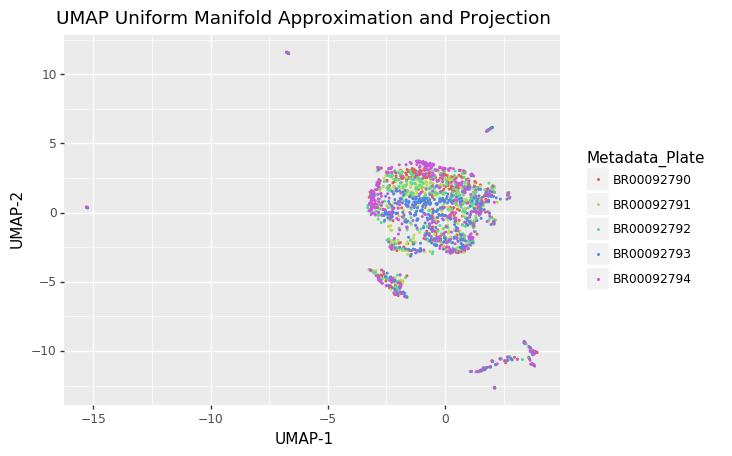

<ggplot: (-9223372036537061225)>

In [19]:
p = gg.ggplot(target_merged, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_broad_sample')) + \
    gg.geom_point(size = 0.2) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.ggtitle("UMAP Uniform Manifold Approximation and Projection") #+ \
    #gg.scale_colour_manual(name= "Platemap", labels=['Drug_Controls', 'Drug_Treatments', 'Target_Controls', 'Target_Treatments'], values = ["#d95f0e", "#fec44f", "#2c7fb8", "#7fcdbb"])
   


    

ggsave(filename='target_UMAP.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

In [483]:
Metadata = [col for col in data.columns if 'Meta' in col]
Variables = [col for col in data.columns if not 'Meta' in col]

In [484]:

x = data.loc[:, Variables].values
y = data.loc[:, Metadata].values

In [485]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [486]:
pc = pca.fit_transform(x)
df= pd.DataFrame(pc, columns= ['PC-1', 'PC-2', 'PC-3'])


In [488]:
combined = df.merge(data[Metadata], left_index=True, right_index=True)
combined.shape

(54143, 22)

In [489]:
combined['Metadata_platemap'] = None

combined.loc[(combined.Metadata_Plate_Map_Name == "C-7217-01-B80-003-A549") & (combined.Metadata_broad_sample == "DMSO"), 'Metadata_platemap'] = "Target_DMSO"
combined.loc[(combined.Metadata_Plate_Map_Name == "C-7217-01-B80-003-A549") & (combined.Metadata_broad_sample != "DMSO"), 'Metadata_platemap'] = "Target_Treatments"
combined.loc[(combined.Metadata_Plate_Map_Name != "C-7217-01-B80-003-A549") & (combined.Metadata_broad_sample == "DMSO"), 'Metadata_platemap'] = "Drug_DMSO"
combined.loc[(combined.Metadata_Plate_Map_Name != "C-7217-01-B80-003-A549") & (combined.Metadata_broad_sample != "DMSO"), 'Metadata_platemap'] = "Drug_Treatments"
combined.shape

(54143, 22)

0          Drug_DMSO
1          Drug_DMSO
2          Drug_DMSO
3          Drug_DMSO
4          Drug_DMSO
            ...     
54138    Target_DMSO
54139    Target_DMSO
54140    Target_DMSO
54141    Target_DMSO
54142    Target_DMSO
Name: Metadata_platemap, Length: 54143, dtype: object

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning:

Saving 6.4 x 4.8 in image.

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning:

Filename: /Users/habbasi/Desktop/Combined_Drug_target_PCA.png



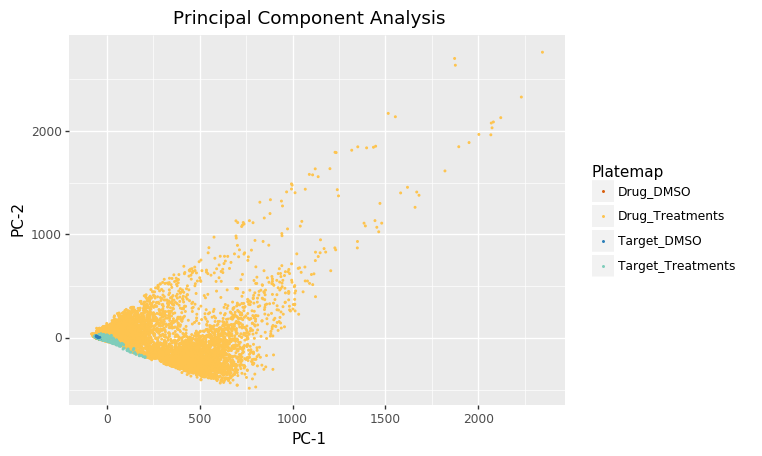

<ggplot: (392646064)>

In [494]:
p = gg.ggplot(combined, gg.aes(x='PC-1', y='PC-2', color= 'Metadata_platemap')) + \
    gg.geom_point(size = 0.2) + \
    gg.xlab("PC-1") + \
    gg.ylab("PC-2") + \
    gg.ggtitle("Principal Component Analysis") + \
    gg.scale_colour_manual(name= "Platemap", labels=['Drug_DMSO', 'Drug_Treatments', 'Target_DMSO', 'Target_Treatments'], values = ["#d95f0e", "#fec44f", "#2c7fb8", "#7fcdbb"]) 
   


    

ggsave(filename='Combined_Drug_target_PCA.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

In [496]:
new = combined.loc[combined.Metadata_Plate_Map_Name == "C-7217-01-B80-003-A549"]
new.shape

(1920, 22)

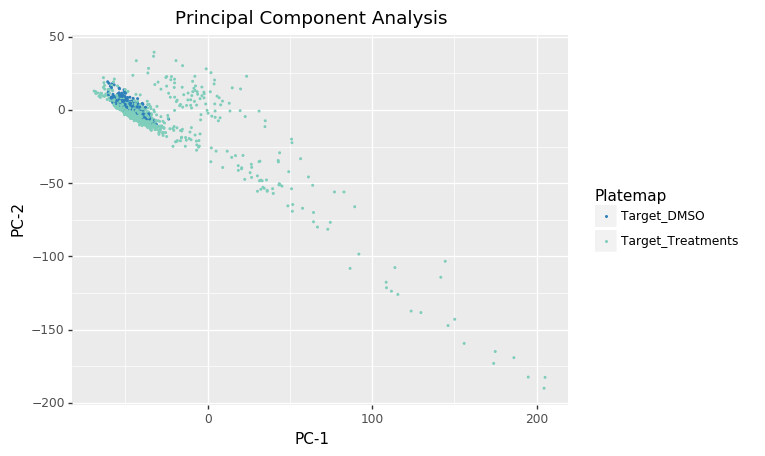

<ggplot: (-9223372036468776227)>

In [498]:
p = gg.ggplot(new, gg.aes(x='PC-1', y='PC-2', color= 'Metadata_platemap')) + \
    gg.geom_point(size = 0.2) + \
    gg.xlab("PC-1") + \
    gg.ylab("PC-2") + \
    gg.ggtitle("Principal Component Analysis") + \
    gg.scale_colour_manual(name= "Platemap", labels=['Target_DMSO', 'Target_Treatments'], values = ["#2c7fb8", "#7fcdbb"]) 
   


    

#ggsave(filename='Combined_Drug_target_PCA.png', plot = p, path = '/Users/habbasi/Desktop/')

p 